# Financial Planning

In [1]:
 # Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

**Personal Finance Planner**

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [4]:
#load env
load_dotenv()

True

In [5]:
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

#get current value of "m cryptons"
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

#print output on cryto wallet
print(f"My Bitcoin balance is ${my_btc_value}")
print(f"My Ethereum balance is ${my_eth_value}")


My Bitcoin balance is $22408.5
My Ethereum balance is $2679.786


**Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)**

In [8]:
# Current amount of shares
# YOUR CODE HERE!
 # Set current amount of shares data
#assumption : our stocks AMAT and ORCL
my_AGG = 200
my_SPY = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [11]:
# Format current date as ISO format
# YOUR CODE HERE!
from datetime import datetime
startdate = datetime.now()

#iso format
today = pd.Timestamp(startdate, tz="America/New_York").isoformat()

#set tickers
tickers = ['AGG','SPY']

#timeframe
timeframe = '1D'

#get closing prices
df_investments = alpaca.get_barset(tickers, timeframe, start = today).df

# take a peek
df_investments.head ()

AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2020-11-20 00:00:00-05:00  118.19  118.22  118.13  118.21  1512014  357.5   

                                                             
                             high     low   close    volume  
time                                                         
2020-11-20 00:00:00-05:00  357.72  356.18  357.43  20175709

In [12]:
 # Pick AGG and SPY close prices
AGG_close_price = round(df_investments[tickers[0]]['close'][0],2)
SPY_close_price = round(df_investments[tickers[1]]['close'][0],2)
# Print AGG and SPY close prices
print("Current price AGG",AGG_close_price)
print("Current price SPY",SPY_close_price)


Current price AGG 118.21
Current price SPY 357.43


In [13]:
# Compute the current value of shares
my_AGG_value = my_AGG * AGG_close_price
my_SPY_value = my_SPY * SPY_close_price

#print output on stocks
print(f"My AGG ${my_AGG_value}")
print(f"My SPY ${my_SPY_value}")

My AGG $23642.0
My SPY $17871.5


**Savings Health Analysis**

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [
    my_btc_value+my_eth_value,
    my_AGG_value+my_SPY_value
]

# Display savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'],index=['crypto','shares'])

df_savings

,amount
crypto,25088.286
shares,41513.500


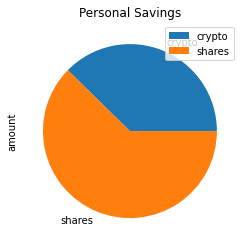

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Personal Savings');

In [16]:
 # Set ideal emergency fund
#emergency_fund = monthly_income * 3
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations!  You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("You have exactly 3 months saved up")
else:
    print("You need "+str(emergency_fund-total_savings)+" to save more!")

Congratulations!  You have enough money in your emergency fund.


**Part 2 - Retirement Planning (Monte Carlo Simulation)**

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-18', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data.head()
#df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597  206.04   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263  208.59   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587  209.45   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639  209.38   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821  207.87   

                                                             
                             high     low   close    volume  
time                                                         
2015-11-18 00:00:00-05:00  208.90  205.99  208.71  94448031  
2015-11-19 00:00:00-05:00  209.05  208.20  208.53  61897641  
2015-11-20 00:00:00-05:00  210.12  208.86  209.35  67021762  
2015-11-23 00:00:00-05:00  209.98  208.52  209.06  54738608  
2015-11-24 00:00:00-05:00  209.83  207.41  209.38  81748691

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-11-18 00:00:00-05:00          NaN  206.04  208.90  205.99  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.20  208.53   
2015-11-20 00:00:00-05:00    -0.000552  209.45  210.12  208.86  209.35   
2015-11-23 00:00:00-05:00     0.000552  209.38  209.98  208.52  209.06   
2015-11-24 00:00:00-05:00     0.000460  207.87  209.83  207.41  209.38   

                                                  
                             volume daily_return  
time                                              
2015-11-18 00:00:00-05:00  94448031          NaN  
2015-11-19 00:00:00-05:00  61897641    -0.000862  
2015-11-20 00:00:00-05:00  67021762     0.003932  
2015-11-23 00:00:00-05:00  54738608    -0.001385  
2015-11-24 00:00:00-05:00  81748691     0.001531

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007202,1.013558,1.012627,0.997613,1.001594,1.007668,1.003270,1.010224,1.001614,0.994459,...,0.998286,0.997823,1.002020,0.987474,0.985675,0.987332,1.001030,1.002218,0.996450,0.989936
2,0.994219,1.012974,1.001013,1.001754,1.006932,1.001022,0.991717,1.004579,1.009126,0.999888,...,1.002647,1.003344,0.999541,0.996749,0.985625,0.982219,1.006323,1.008633,0.995900,0.978688
3,1.003276,1.016570,1.000346,1.008086,1.018517,1.015083,0.992336,0.998123,1.007086,1.001909,...,1.005456,1.012948,1.006206,1.004584,0.974144,0.987252,1.005788,0.997997,1.002286,0.980985
4,1.005372,1.023386,1.001058,0.993629,1.028061,1.017417,0.991509,1.011968,1.005504,0.997954,...,1.004405,1.012653,0.995232,1.004020,0.975381,0.990239,1.002056,1.004174,1.008682,0.974601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.164324,1.730734,16.525563,6.702350,13.285647,4.529718,10.787446,12.188233,11.831433,28.901956,...,7.885062,3.232642,7.087495,7.900498,6.334525,4.497346,11.464250,7.155342,7.839228,14.568753
7557,5.174337,1.731371,16.578043,6.766665,13.334971,4.508673,10.749606,12.269602,11.845011,28.777888,...,7.948590,3.236770,7.118814,7.961176,6.275176,4.430415,11.571221,7.123652,7.814519,14.470571
7558,5.208900,1.742674,16.503984,6.864597,13.306902,4.460492,10.685259,12.236085,11.673079,29.069715,...,7.873144,3.233291,7.096660,7.935155,6.265099,4.417026,11.468752,7.146127,7.792552,14.559807
7559,5.192965,1.743362,16.739975,6.880630,13.398685,4.444669,10.793914,12.273051,11.583539,28.945242,...,7.788786,3.229031,7.067244,7.917721,6.264499,4.481005,11.442161,7.145642,7.793644,14.602782


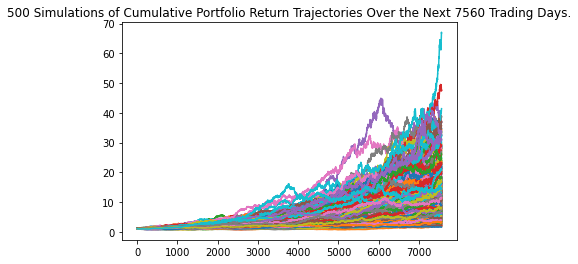

In [22]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

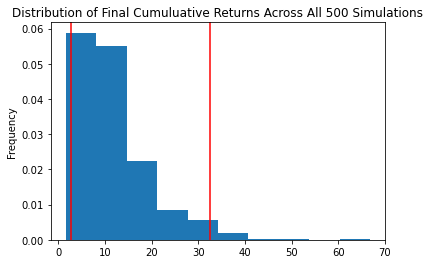

In [23]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

**Retirement Analysis**

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)    

count           500.000000
mean             11.646077
std               7.803354
min               1.602053
25%               6.238263
50%               9.662981
75%              14.798491
max              66.861743
95% CI Lower      2.653717
95% CI Upper     32.579498
Name: 7560, dtype: float64


**Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.**

In [25]:
# Set initial investment
int_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_Lower = round(tbl[8] * int_investment,2)
CI_Upper = round(tbl[9] * int_investment,2)

#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 30 years will end within in the range of"
      #f" ${ci_lower} and ${ci_upper}")
print(f"There is a 95% chance that an initial investment of {int_investment} will end within the range of ${CI_Lower} to ${CI_Upper} over the next 30 years.")

There is a 95% chance that an initial investment of 20000 will end within the range of $53074.33 to $651589.96 over the next 30 years.


**Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.**

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

int_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_Lower = round(tbl[8] * int_investment,2)
CI_Upper = round(tbl[9] * int_investment,2)

#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 30 years will end within in the range of"
      #f" ${ci_lower} and ${ci_upper}")
print(f"There is a 95% chance that an initial investment of {int_investment} will end within the range of ${CI_Lower} to ${CI_Upper} over the next 30 years.")

There is a 95% chance that an initial investment of 30000 will end within the range of $79611.5 to $977384.94 over the next 30 years.


**Optional Challenge - Early Retirement**

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with 10% in bonds (AGG) and 90% in stocks (SPY)
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Printing the simulation input data
MC_ten_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-11-18 00:00:00-05:00          NaN  206.04  208.90  205.99  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.20  208.53   
2015-11-20 00:00:00-05:00    -0.000552  209.45  210.12  208.86  209.35   
2015-11-23 00:00:00-05:00     0.000552  209.38  209.98  208.52  209.06   
2015-11-24 00:00:00-05:00     0.000460  207.87  209.83  207.41  209.38   

                                                  
                             volume daily_return  
time                                              
2015-11-18 00:00:00-05:00  94448031          NaN  
2015-11-19 00:00:00-05:00  61897641    -0.000862  
2015-11-20 00:00:00-05:00  67021762     0.003932  
2015-11-23 00:00:00-05:00  54738608    -0.001385  
2015-11-24 00:00:00-05:00  81748691     0.001531

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004799,0.989445,1.006001,1.011542,1.009197,1.002242,0.996316,0.996387,1.009377,1.002249,...,1.008666,0.995519,0.982740,0.993674,1.020341,1.001178,0.998417,1.008139,1.017341,1.010742
2,1.003796,0.975582,1.010404,1.015348,1.022552,1.026351,1.004684,0.977919,1.002993,1.013699,...,1.013187,0.994506,0.993530,1.005858,1.032120,0.997377,1.000043,1.019487,1.021497,1.024355
3,0.988200,0.979868,1.013547,1.012174,1.007395,1.011597,1.013346,0.978938,1.015471,1.020205,...,1.022377,0.995871,0.992731,0.995185,1.050656,0.990610,1.011127,0.993541,1.014991,1.022906
4,0.982590,0.990022,1.000778,1.003540,1.014365,1.000155,1.014676,0.987113,1.012615,1.015605,...,1.028910,0.975245,0.983019,0.992446,1.055119,0.978699,0.989083,1.000478,1.004429,1.053385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.044686,3.284842,3.661333,3.105368,1.336864,3.029697,1.821939,2.571782,1.469231,5.713615,...,2.884581,2.660184,1.545266,1.899174,2.938349,2.064837,3.495750,1.152022,1.000055,1.188253
2517,2.042054,3.319396,3.680572,3.109268,1.328893,3.036822,1.801325,2.570529,1.461960,5.689798,...,2.909126,2.605801,1.538267,1.851737,2.966705,2.036388,3.512799,1.155461,1.014387,1.195999
2518,2.037275,3.268183,3.671260,3.107267,1.331973,3.016361,1.820629,2.541256,1.473741,5.646489,...,2.919513,2.618783,1.548257,1.852437,2.959726,2.040764,3.530979,1.171595,1.011310,1.173578
2519,2.041023,3.263932,3.683657,3.009743,1.336759,2.986553,1.804768,2.521638,1.469613,5.627083,...,2.884476,2.655642,1.542281,1.819063,2.950011,2.040869,3.473991,1.161091,1.018223,1.168819


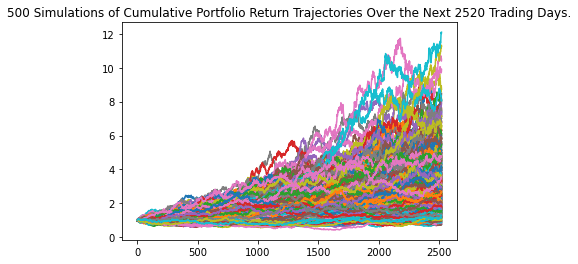

In [33]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

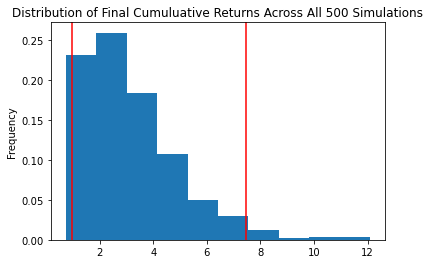

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

**Retirement Analysis**

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)    

count           500.000000
mean              3.165579
std               1.770122
min               0.730979
25%               1.851855
50%               2.783630
75%               4.086635
max              12.095333
95% CI Lower      0.968382
95% CI Upper      7.475914
Name: 2520, dtype: float64


**Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment**

In [39]:
# Set initial investment
int_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_Lower = round(tbl[8] * int_investment,2)
CI_Upper = round(tbl[9] * int_investment,2)

#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 10 years will end within in the range of"
      #f" ${ci_lower} and ${ci_upper}")
print(f"There is a 95% chance that an initial investment of {int_investment} will end within the range of ${CI_Lower} to ${CI_Upper} over the next 10 years.")

There is a 95% chance that an initial investment of 20000 will end within the range of $19367.64 to $149518.27 over the next 10 years.
